## Plot WROMY data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy import nan
from pathlib import Path
from obspy import UTCDateTime

from andbro__get_timeaxis import __get_timeaxis

### Methods

In [2]:
def __read_furt_data(config):
    '''
    Load data of FURT wather station
    
    '''
       
    path_to_archive = '/bay200/gif_online/FURT/WETTER/'
        
    if not Path(path_to_archive).exists():
        print(f"  -> Path: {path_to_archive}, does not exists!")
        return    
    
    
    df = pd.DataFrame()
    
    for i, date in enumerate(np.arange(config['tbeg'].date, (config['tend']+86400).date)):
        
        date = UTCDateTime(str(date)).date
        filename = f'FURT.WSX.D.{str(date.day).rjust(2,"0")}{str(date.month).rjust(2,"0")}{str(date.year).rjust(2,"0")[-2:]}.0000'
        
        print(f'   reading {filename} ...')

        try:

            df0 = pd.read_csv(path_to_archive+filename, usecols=[0,1,10,12,13,14], names=['date', 'time', 'T', 'H', 'P','R'])
            ## substitute strings with floats
            df0['T'] = df0['T'].str.split("=", expand=True)[1].str.split("C", expand=True)[0].astype(float)
            df0['P'] = df0['P'].str.split("=", expand=True)[1].str.split("H", expand=True)[0].astype(float)
            df0['H'] = df0['H'].str.split("=", expand=True)[1].str.split("P", expand=True)[0].astype(float)
            df0['R'] = df0['R'].str.split("=", expand=True)[1].str.split("M", expand=True)[0].astype(float)

            
            ## replace error indicating values (-9999, 999.9) with NaN values
            df0.replace(to_replace=-9999, value=nan, inplace=True)
            df0.replace(to_replace=999.9, value=nan, inplace=True)
            
            
            if df.empty:
                df = df0
            else: 
                df = pd.concat([df, df0])
        except:
            print(f"  -> File: {filename}, does not exists!")
   
    df.reset_index(inplace=True, drop=True)
        
    return df

In [5]:
def __makeplot_percipitation(df, config):

    ## extract the dates
    days = df.date.unique()

    ## get the cumulative rain per day
    rain = []
    for day in days:
        tmp = df[df.date == day]
        rain.append(tmp.R.max())
    
    ## make the plot
    fig, ax = plt.subplots(1, figsize=(15,5))

    font = 12

    ax.bar(range(len(days)), rain, zorder=2, width=1, alpha=0.9)
    ax.plot(np.linspace(-0.5, len(days)-0.5, len(df.R)), df.R, color='r',alpha=0.5, zorder=3)

    ax.set_xticks(range(len(days)))
    ax.set_xticklabels(days, rotation=40)

    ax.set_ylabel("Percipitation (mm)", fontsize=font)
    ax.set_title(f"Percipitation at {config.get('station')}")
    
    ax.grid(zorder=0)

    plt.show();
    return fig

### Configurations

In [12]:
config = {}

config['channel'] = None

config['station'] = 'FURT'

config['tbeg'] = UTCDateTime('2021-08-25')
config['tend'] = UTCDateTime('2021-09-01')


In [13]:
df0 = __read_furt_data(config)

   reading FURT.WSX.D.250821.0000 ...
   reading FURT.WSX.D.260821.0000 ...
   reading FURT.WSX.D.270821.0000 ...
   reading FURT.WSX.D.280821.0000 ...
   reading FURT.WSX.D.290821.0000 ...
   reading FURT.WSX.D.300821.0000 ...
   reading FURT.WSX.D.310821.0000 ...
   reading FURT.WSX.D.010921.0000 ...


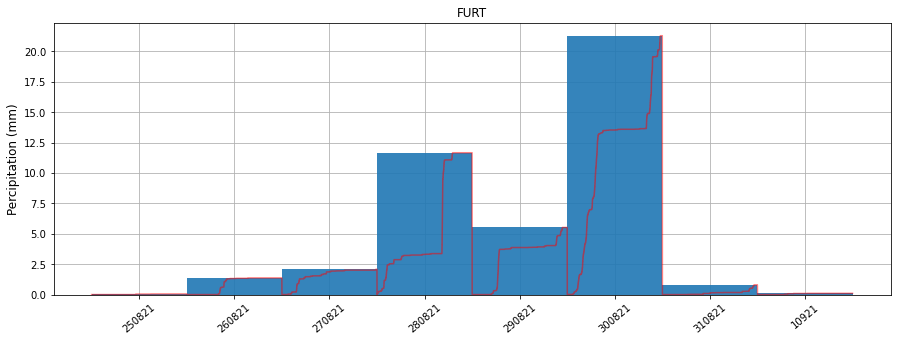

In [14]:
df = df0.copy()

__makeplot_percipitation(df, config);